In [16]:
using Pkg
Pkg.add("Plots")

    Updating registry at `C:\Users\youva\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\youva\College\COT4501\Project.toml`
  No Changes to `C:\Users\youva\College\COT4501\Manifest.toml`


In [17]:
using Plots

# Step 1: 1-D Linear Convection

- Equation represents propogation of an intial wave with speed c, without change of shape
- If u(x,0) = u0(x), then a solution is u(x,t) = u0(x-ct)
- We use forward difference for time derivaive and backward difference for space derivative. Why?

In [93]:
nx = 41  # number of grid poins
dx = 2/(nx-1)  # if our spatial domain is (0,2)
nt = 25  # number of timesteps we want to calculate
dt = .025  # amount of time each tmiestep covers
c = 1  # wavespeed

1

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

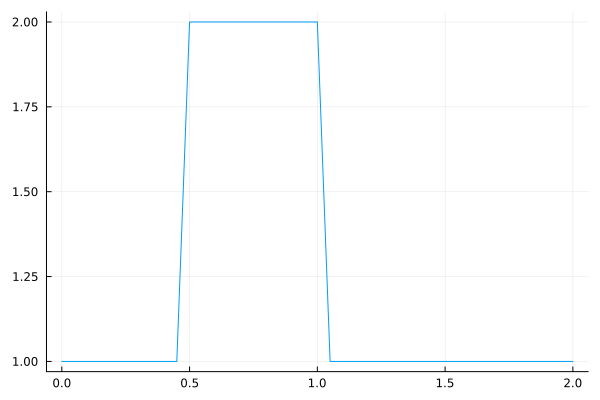

In [94]:
# setting initial conditions
u = ones(nx)
u[Int(floor(0.5 / dx)) + 1:Int(floor(1 / dx)) + 1] .= 2
print(u)

x = range(0, stop=2, length=nx)
plot(x, u, legend=false)

Observe that the hat function doesnot have perfectly straight sides, this is because of our discretization. We can see it approach a straight lint as nx increases.

In [95]:
function animate_initial_conditions(max_nx=200)
    anim = @animate for nx in 4:max_nx
        dx = 2/(nx-1)
        u = ones(nx)
        u[Int(floor(0.5 / dx)) + 1:Int(floor(1 / dx)) + 1] .= 2
        x = range(0, stop=2, length=nx)
        plot(x, u, legend=false)
        
    end
    gif(anim, "hat_animation.gif", fps = 5)  # Save the animation as a GIF file
end

animate_initial_conditions (generic function with 2 methods)

In [97]:
# animate_initial_conditions()

Now, let's see what our final wave looks like

In [98]:
un = ones(nx)  # initialize temporary array

for n in 1:nt  # Loop over each timestep
    un = copy(u)  # Copy the current state of u into un
    for i in 2:nx  # Iterate over spatial grid points, starting from 2 because Julia is 1-indexed
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    end
end

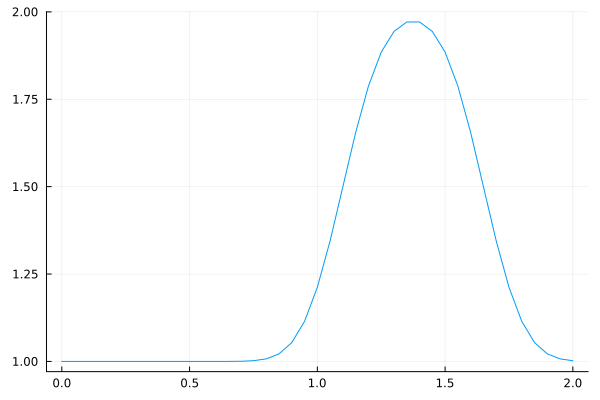

In [99]:
x = range(0, stop=2, length=nx)
plot(x, u, legend=false)

In [100]:
function animate_final_wave(max_nx=200, nt=25, dt=.025)
    anim = @animate for nx in 4:max_nx
        dx = 2/(nx-1)  # if our spatial domain is (0,2)
        u = ones(nx)
        u[Int(floor(0.5 / dx)) + 1:Int(floor(1 / dx)) + 1] .= 2
        un = ones(nx)  # initialize temporary array

        for n in 1:nt  # Loop over each timestep
            un = copy(u)  # Copy the current state of u into un
            for i in 2:nx  # Iterate over spatial grid points, starting from 2 because Julia is 1-indexed
                u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
            end
        end
        x = range(0, stop=2, length=nx)
        plot(x, u, legend=false)
        
    end
    gif(anim, "final_wave_animation.gif", fps = 5)  # Save the animation as a GIF file
end

animate_final_wave (generic function with 4 methods)

Now, what does our final wave look like depending on how small our grid is.

In [102]:
# animate_final_wave()

Questions:
- Why is it blowing up when nx begins to increase? Numerically unstable?
- The hat function has moved to the right, but it's no longer a hat. What's going on?

In [106]:
function animate_wave_propagation(nx=150, max_nt=25, dt=0.025, c=1.0)
    dx = 2 / (nx - 1) # Spatial step size, assuming spatial domain is (0, 2)
    u = ones(nx) # Initial condition, wave at rest

    # Set initial wave pulse
    u[Int(floor(0.5 / dx)) + 1 : Int(floor(1 / dx)) + 1] .= 2

    anim = @animate for nt in 1:max_nt
        un = copy(u) # Copy the current state of u into un

        for i in 2:nx-1 # Iterate over spatial grid points, leaving out the first and last point for boundary conditions
            # Simple finite difference method for convection equation
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        end

        x = range(0, stop=2, length=nx) # Spatial domain
        plot(x, u, legend=false, ylims=(0.5, 2.5)) # Plot current state with fixed y-axis limits
    end

    gif(anim, "wave_propagation_unstable_animation.gif", fps=5) # Save the animation as a GIF file
end

animate_wave_propagation (generic function with 5 methods)

Let's look at wave propogation in our unstable setting.

In [109]:
# animate_wave_propagation()

In [110]:
function animate_wave_propagation_adaptive_steps(nx=200, max_nt=600, initial_dt=0.01, c=1.0)
    dx = 2.0 / (nx-1) # Spatial step size
    u = ones(nx) # Initial condition, wave at rest

    # Set initial wave pulse
    u[Int(floor(0.5 / dx)) + 1 : Int(floor(1 / dx)) + 1] .= 2

    anim = @animate for nt in 1:max_nt
        max_u = maximum(u)
        dt = min(dx / max_u, initial_dt) # Adaptive time step based on CFL condition
        Courant = c * dt / dx # Calculate Courant number
        #@show dt
        #@show Courant

        un = copy(u) # Copy the current state of u into un

        for i in 2:nx # Iterate over spatial grid points, leaving out the first point for boundary condition
            # Finite difference method for convection equation
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        end

        x = range(0, stop=1, length=nx) # Spatial domain
        plot(x, u, legend=false, ylims=(0, 3)) # Plot current state with fixed y-axis limits
    end

    gif(anim, "wave_propagation_animation_adaptive_steps.gif", fps=10) # Save the animation as a GIF file
end

animate_wave_propagation_adaptive_steps (generic function with 5 methods)

Now, lets look at it in a stable setting using adaptive time steps.

In [112]:
# animate_wave_propagation_adaptive_steps()